## PIMS Hackathon, Seattle 2025
### Project B - Preconditioners for Thermal Radiative Transfer
Packages: jupyter, numpy, matplotlib

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from solvers import *
from post_process import *

L2  : 8.762331740438677e-10
Linf: 4.312269652473333e-09


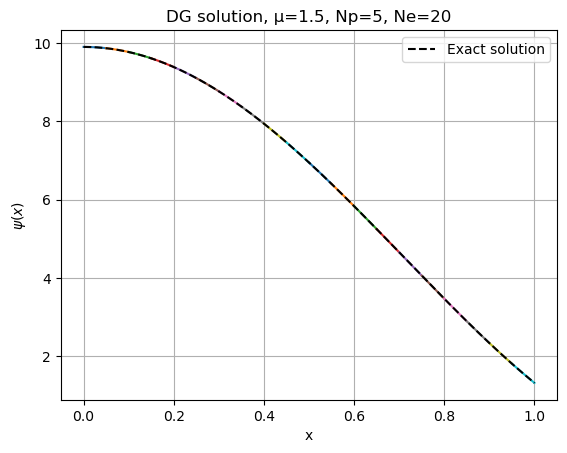

In [5]:
# ─── Example usage ───

# Parameters for the transport problem
μ       = 1.5
σ_t     = lambda x: x**2 + 1
source  = lambda x: (μ**3)*(2*x - 6.8*np.sin(2*x)) + (σ_t(x) * (μ**2)*((x**2 +1) + 3.4*np.cos(2*x)))
inflow  = lambda x: (μ**2)*((x**2 +1) + 3.4*np.cos(2*x))

# Mesh parameters
Ne = 20
xs      = np.linspace(0, 1, Ne + 1) # Mesh points / element boundaries
Np      = 5                     # Legendre polynomials per element (basis size)

# Plot numerical solution against the exact solution (MMS)
ψ_MMS     = lambda x: (μ**2)*((x**2 +1) + 3.4*np.cos(2*x))
ψ_weights = transport_direct_solve(μ, σ_t, compute_source_term(source, Np, xs), inflow, Np, xs)
ψ_weights = ψ_weights.reshape(Ne, Np)

# Print the error in the solution
print("L2  :",error_Lp(ψ_weights, xs, Np, ψ_MMS, p=2))
print("Linf:",error_Lp(ψ_weights, xs, Np, ψ_MMS, p='inf'))
plot_solution(ψ_weights, xs, Np, μ=μ, exact_ψ_func=ψ_MMS)

  8%|▊         | 779/10000 [00:06<01:11, 128.77it/s]


Converged in 779 iterations
Chosen μ: -0.6546536707079773
L2  : 0.0003171757385498243
Linf: 0.0009116424741265616


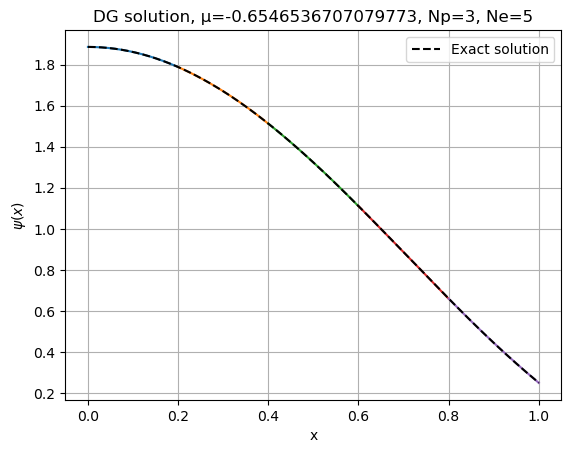

In [20]:
# ─── Example usage (Fixed point iteration) ───

# Parameters for the transport problem
ψ_MMS  = lambda x,μ: (μ**2)*((x**2 +1) + 3.4*np.cos(2*x)) # Manufactured solution
σ_t    = lambda x: x**3 + 1
σ_a    = lambda x: x**2 + 1
ε      = 0.1
source = lambda x,μ: (μ**3)/ε * (2*x - 6.8*np.sin(2*x)) + (σ_t(x)/ε**2 * ψ_MMS(x,μ)) \
                   - (σ_t(x)/ε - ε*σ_a(x)) / (3*ε) * ((x**2 +1) + 3.4*np.cos(2*x))
inflow = lambda x,μ: ψ_MMS(x,μ)
 
# Mesh parameters
Np = 3                      # Legendre polynomials per element (basis size)
Nμ = 5                      # Legendre polynomials per element (basis size)
xs = np.linspace(0, 1, 6) # Mesh points / element boundaries

# Solve
ψ_weights_all, μs, t = transport_direct_solve_diffusive(σ_t, σ_a, ε, source, inflow, Np, Nμ, xs, 
                                                     max_iter=int(1e4), tol=1e-10)
μi = 1 # Chosen μ for the error calculation
μc = μs[μi]
print("Chosen μ:", μc)

# Print the error in the solution
print("L2  :",error_Lp(ψ_weights_all[μi,:,:], xs, Np, lambda x: ψ_MMS(x,μc), p=2))
print("Linf:",error_Lp(ψ_weights_all[μi,:,:], xs, Np, lambda x: ψ_MMS(x,μc), p='inf'))

# Plot numerical solution against the exact solution (MMS)
plot_solution(ψ_weights_all[μi,:,:], xs, Np, μ=μc, exact_ψ_func=lambda x: ψ_MMS(x,μc))

  0%|          | 10/10000 [00:00<01:31, 109.25it/s]


Converged in 10 iterations


  0%|          | 8/10000 [00:00<01:31, 109.33it/s]


Converged in 8 iterations


  0%|          | 8/10000 [00:00<01:30, 110.27it/s]


Converged in 8 iterations


  0%|          | 10/10000 [00:00<01:36, 103.26it/s]

Converged in 10 iterations



  0%|          | 11/10000 [00:00<01:36, 103.31it/s]


Converged in 11 iterations


  0%|          | 13/10000 [00:00<01:36, 104.02it/s]


Converged in 13 iterations


  0%|          | 12/10000 [00:00<01:26, 115.45it/s]

Converged in 14 iterations

  0%|          | 14/10000 [00:00<02:11, 76.05it/s] 


  0%|          | 16/10000 [00:00<01:33, 106.30it/s]


Converged in 16 iterations


  0%|          | 18/10000 [00:00<01:28, 113.19it/s]


Converged in 18 iterations


  0%|          | 19/10000 [00:00<01:27, 113.78it/s]


Converged in 19 iterations


  0%|          | 21/10000 [00:00<01:24, 118.66it/s]


Converged in 21 iterations


  0%|          | 13/10000 [00:00<01:20, 124.11it/s]

Converged in 23 iterations

  0%|          | 23/10000 [00:00<01:23, 119.82it/s]


  0%|          | 25/10000 [00:00<01:23, 119.77it/s]


Converged in 25 iterations


  0%|          | 27/10000 [00:00<01:23, 120.13it/s]


Converged in 27 iterations


  0%|          | 29/10000 [00:00<01:21, 121.81it/s]


Converged in 29 iterations


  0%|          | 32/10000 [00:00<01:21, 122.25it/s]


Converged in 32 iterations


  0%|          | 35/10000 [00:00<01:23, 118.97it/s]


Converged in 35 iterations


  0%|          | 38/10000 [00:00<01:38, 101.33it/s]


Converged in 38 iterations


  0%|          | 41/10000 [00:00<01:31, 108.80it/s]


Converged in 41 iterations


  0%|          | 45/10000 [00:00<01:19, 125.27it/s]


Converged in 45 iterations


  0%|          | 49/10000 [00:00<01:21, 121.73it/s]


Converged in 49 iterations


  1%|          | 54/10000 [00:00<01:22, 120.63it/s]


Converged in 54 iterations


  1%|          | 59/10000 [00:00<01:19, 125.38it/s]


Converged in 59 iterations


  1%|          | 66/10000 [00:00<01:19, 125.33it/s]


Converged in 66 iterations


  1%|          | 73/10000 [00:00<01:18, 127.14it/s]


Converged in 73 iterations


  1%|          | 81/10000 [00:00<01:17, 127.53it/s]


Converged in 81 iterations


  1%|          | 92/10000 [00:00<01:22, 120.72it/s]


Converged in 92 iterations


  1%|          | 104/10000 [00:00<01:16, 128.97it/s]


Converged in 104 iterations


  1%|          | 119/10000 [00:00<01:16, 128.33it/s]


Converged in 119 iterations


  1%|▏         | 137/10000 [00:01<01:16, 129.01it/s]


Converged in 137 iterations


  2%|▏         | 161/10000 [00:01<01:17, 127.75it/s]


Converged in 161 iterations


  2%|▏         | 192/10000 [00:01<01:17, 126.03it/s]


Converged in 192 iterations


  2%|▏         | 235/10000 [00:01<01:18, 124.56it/s]


Converged in 235 iterations


  3%|▎         | 295/10000 [00:02<01:16, 126.23it/s]


Converged in 295 iterations


  4%|▍         | 384/10000 [00:03<01:18, 123.24it/s]


Converged in 384 iterations


  5%|▌         | 526/10000 [00:04<01:16, 123.10it/s]


Converged in 526 iterations


  8%|▊         | 779/10000 [00:06<01:11, 128.65it/s]


Converged in 779 iterations


 13%|█▎        | 1302/10000 [00:09<01:06, 130.31it/s]


Converged in 1302 iterations


 27%|██▋       | 2714/10000 [00:21<00:56, 128.86it/s]


Converged in 2714 iterations


 97%|█████████▋| 9735/10000 [01:14<00:02, 130.24it/s]

Converged in 9735 iterations


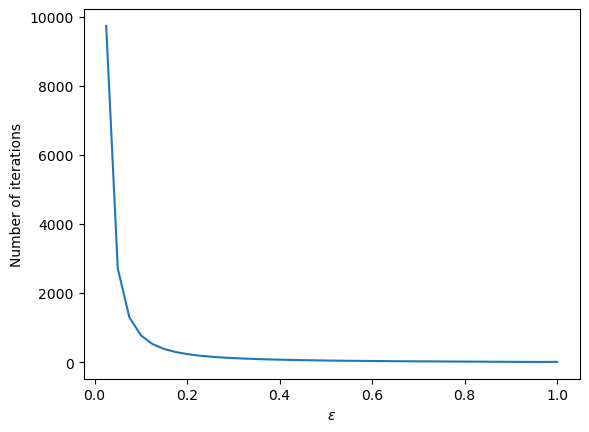

In [21]:
εs = np.arange(1, 0, -0.025)
n_iter = []
for ε in εs:
    # Parameters for the transport problem
    ψ_MMS  = lambda x,μ: (μ**2)*((x**2 +1) + 3.4*np.cos(2*x)) # Manufactured solution
    σ_t    = lambda x: x**3 + 1
    σ_a    = lambda x: x**2 + 1
    source = lambda x,μ: (μ**3)/ε * (2*x - 6.8*np.sin(2*x)) + (σ_t(x)/ε**2 * ψ_MMS(x,μ)) \
                    - (σ_t(x)/ε - ε*σ_a(x)) / (3*ε) * ((x**2 +1) + 3.4*np.cos(2*x))
    inflow = lambda x,μ: ψ_MMS(x,μ)
    
    # Mesh parameters
    Np = 3                      # Legendre polynomials per element (basis size)
    Nμ = 5                      # Legendre polynomials per element (basis size)
    xs = np.linspace(0, 1, 6) # Mesh points / element boundaries

    # Solve
    ψ_weights_all, μs, t = transport_direct_solve_diffusive(σ_t, σ_a, ε, source, inflow, Np, Nμ, xs, 
                                                        max_iter=int(1e4), tol=1e-10)
    n_iter.append(t)

plt.plot(εs, n_iter)
plt.xlabel(r"$\epsilon$")
plt.ylabel(r"Number of iterations")
plt.show()


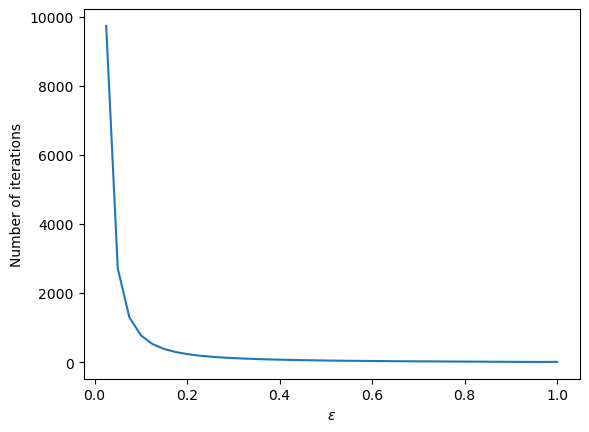

In [22]:
plt.plot(εs, n_iter)
plt.xlabel(r"$\epsilon$")
plt.ylabel(r"Number of iterations")
plt.savefig("test_figures/n_iter_vs_epsilon.pdf")